<a href="https://colab.research.google.com/github/bdugick89/Data-Science-Bootcamp/blob/main/Brannon_3b_EDA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Exercise

In this exercise, you will read in your data, do some preliminary data cleaning, and do EDA to better understand your data.

[The dataset]( http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv ) for this exercise is saved in an Amazon Web Services ( AWS ) S3 bucket. The original source and details about this dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

Below are the steps you'll need to perform for the EDA. Make sure to use text blocks to organize your analysis.  Discuss any trends/relationships/issues you discover at each step in the analysis.

1. Import `pandas` as `pd`, `matplotlib.pyplot as plt`, and `seaborn as sns`.
1. Read in the csv file found at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv .
1. Understand your data by using at least 4 pandas methods (e.g., `.head()`).
1. Make a copy of your data frame. In your copy, remove any rows that contain null values.  
1. Calculate summary statistics on one or more columns.
1. Generate at least 3 univariate plots.
1. Generate a correlation plot.
1. Generate a pairplot.
9. If we were going to build a predictive model ( supervised learning ) using this dataset, what do you think would be a good response ( aka target ) variable and why?

## Step 1: Import



Import pandas as pd, matplotlib.pyplot as plt, and seaborn as sns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Get data


Read in the csv file found at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv .


In [3]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv"
df = pd.read_csv( url )
df[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


## Step 3: Understand data


Understand your data by using at least 4 pandas methods (e.g., .head()).


In [19]:
df.head()
df.info()
df.shape
df.describe(include = "all" )
df.columns
df.transpose
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## Step 4: Copy and clean


In [17]:
df.isnull().sum()*10

mpg              0
cylinders        0
displacement     0
horsepower      60
weight           0
acceleration     0
model year       0
origin           0
dtype: int64

Make a copy of your data frame. In your copy, remove any rows that contain null values.


In [18]:
df_clean = df.copy()
df_clean.dropna(axis = 1, inplace=True)
df_clean.isnull().sum()*10

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

## Step 5: Summary stats


Calculate summary statistics on one or more columns.


In [26]:
df_clean['mpg'].mean()


23.514572864321607

In [24]:
df_clean['weight'].median()

2803.5

In [35]:
df_clean['model year'].var()

13.672442818627143

In [ ]:




'''
.median(): Calculates the median of the column values.

Example: df_clean['mpg'].median()

.mode(): Calculates the mode(s) of the column values.

Example: df_clean['mpg'].mode()

.min(): Finds the minimum value in the column.

Example: df_clean['mpg'].min()

.max(): Finds the maximum value in the column.

Example: df_clean['mpg'].max()

.sum(): Computes the sum of the column values.

Example: df_clean['mpg'].sum()

.std(): Computes the standard deviation of the column values.

Example: df_clean['mpg'].std()

.var(): Computes the variance of the column values.

Example: df_clean['mpg'].var()

.count(): Counts the number of non-null values in the column.

Example: df_clean['mpg'].count()

.describe(): Generates descriptive statistics of the column, including count, mean, std, min, 25%, 50%, 75%, and max.

Example: df_clean['mpg'].describe()

.quantile(): Computes the value at a given quantile of the column values.

Example: df_clean['mpg'].quantile(0.25) (to compute the 25th percentile)
'''


## Step 6: Univariate plots


Generate at least 3 univariate plots.


'Univariate:\n\nDefinition: Univariate analysis involves the analysis of a single variable or attribute at a time.\nPurpose: It focuses on understanding the distribution, central tendency, dispersion, and shape of the data for a single variable.\nExamples: Descriptive statistics such as mean, median, mode, standard deviation, histograms, and box plots are commonly used in univariate analysis.\n\n\nHistogram:\n\nDisplays the frequency distribution of continuous variables by dividing the data into intervals (bins) and showing the count or density of observations within each bin.\nDensity Plot (Kernel Density Estimate):\n\nProvides a smoothed estimate of the probability density function of a continuous variable.\nBox Plot (Box-and-Whisker Plot):\n\nSummarizes the distribution of a continuous variable by showing the median, quartiles, and potential outliers.\nViolin Plot:\n\nCombines the features of a box plot and a kernel density plot, displaying the distribution of a continuous variable 

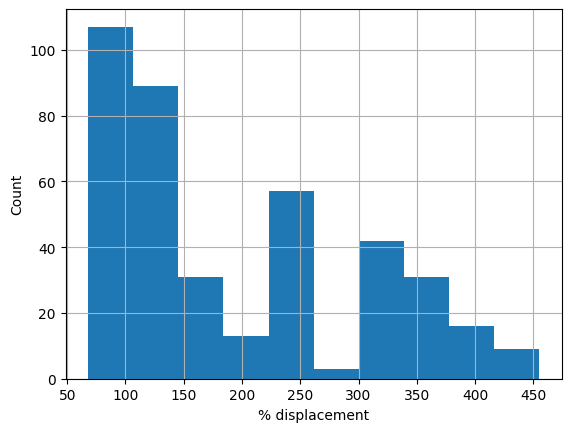

In [37]:
df_clean.columns
df_clean['displacement'].hist()
plt.xlabel('% displacement')
plt.ylabel('Count') ;




'''Univariate:

Definition: Univariate analysis involves the analysis of a single variable or attribute at a time.
Purpose: It focuses on understanding the distribution, central tendency, dispersion, and shape of the data for a single variable.
Examples: Descriptive statistics such as mean, median, mode, standard deviation, histograms, and box plots are commonly used in univariate analysis.


Histogram:

Displays the frequency distribution of continuous variables by dividing the data into intervals (bins) and showing the count or density of observations within each bin.
Density Plot (Kernel Density Estimate):

Provides a smoothed estimate of the probability density function of a continuous variable.
Box Plot (Box-and-Whisker Plot):

Summarizes the distribution of a continuous variable by showing the median, quartiles, and potential outliers.
Violin Plot:

Combines the features of a box plot and a kernel density plot, displaying the distribution of a continuous variable as well as its probability density.
Bar Plot (Bar Chart):

Represents the frequency or count of observations in different categories of a categorical variable using bars.
Pie Chart:

Shows the proportion of each category in a categorical variable as sectors of a circle.
Line Plot (Time Series Plot):

Displays the trend or pattern of a continuous variable over time or another ordered variable.
Dot Plot:

Shows the distribution of a continuous variable by placing dots along a number line.
Strip Plot:

Displays individual data points of a continuous variable along one axis.
Swarm Plot:

Similar to a strip plot but avoids overlapping points by adjusting their positions.
Quantile-Quantile (Q-Q) Plot:

Compares the distribution of a variable against a theoretical distribution (e.g., normal distribution) to assess how closely they match.
Empirical Cumulative Distribution Function (ECDF) Plot:

Shows the cumulative distribution function of a continuous variable, representing the proportion of data values less than or equal to each value.
'''




In [41]:
df_clean.columns


Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

Text(0.5, 1.0, 'Dot Plot of Displacement')

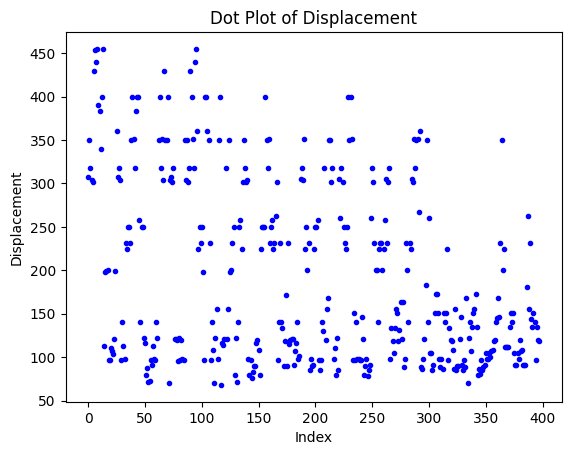

In [42]:

plt.plot(df_clean['displacement'], 'bo', markersize=3)
plt.xlabel('Index')
plt.ylabel('Displacement')
plt.title('Dot Plot of Displacement')

Text(0.5, 1.0, 'Swarm Plot of Displacement')

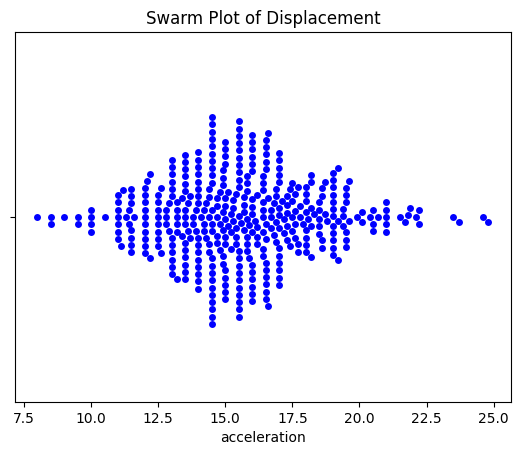

In [43]:
# Create the swarm plot
sns.swarmplot(x=df_clean['acceleration'], color='blue')

# Set the labels and title
plt.xlabel('acceleration')
plt.title('Swarm Plot of Displacement')


## Step 7: Bivariate plot (1/2)


In [ ]:
'''Bivariate:

Definition: Bivariate analysis involves the analysis of the relationship between two variables simultaneously.
Purpose: It aims to understand the relationship, association, or correlation between two variables and how changes in one variable affect the other.
Examples: Scatter plots, correlation coefficients, contingency tables, and cross-tabulations are commonly used in bivariate analysis to visualize and quantify the relationship between two variables.
'''

'''Bivariate chart types are used to visualize the relationship between two variables. Here are some common bivariate chart types:

1. **Scatter Plot**:
   - Displays individual data points as markers on a two-dimensional plane, where each point represents the value of two variables.
   - Useful for visualizing the relationship, correlation, or pattern between two continuous variables.

2. **Line Plot**:
   - Shows the relationship between two variables using lines connecting data points.
   - Often used to display trends or patterns over time or another continuous variable.

3. **Hexbin Plot**:
   - Divides the two-dimensional plane into hexagonal bins and counts the number of observations within each bin.
   - Useful for visualizing the density of points in areas with high data concentration.

4. **Contour Plot**:
   - Represents the joint distribution of two variables using contour lines.
   - Contour lines connect points with the same value, allowing visualization of patterns or clusters in the data.

5. **Heatmap**:
   - Displays the relationship between two variables using colors to represent the magnitude of the relationship.
   - Each cell in the heatmap represents the value of one variable against another.

6. **Bubble Chart**:
   - Similar to a scatter plot but with additional dimension represented by the size of the markers (bubbles).
   - Allows visualization of three variables simultaneously by encoding the third variable as the size of the bubbles.

7. **Box Plot**:
   - Shows the distribution of one variable for different categories of another variable.
   - Useful for comparing the distribution of a continuous variable across different groups or categories.

8. **Violin Plot**:
   - Combines the features of a box plot and a kernel density plot to visualize the distribution of a variable across different categories.

9. **Joint Plot**:
   - Combines multiple univariate plots (e.g., scatter plot, histograms) to visualize the relationship between two variables along with their marginal distributions.

10. **Pair Plot**:
    - Displays pairwise relationships between variables in a dataset.
    - Useful for exploring correlations and patterns across multiple variables simultaneously.

These are some common bivariate chart types used in data visualization to explore the relationship between two variables. The choice of chart type depends on the nature of the data and the research questions being addressed.
'''


Generate a correlation plot.


Text(0.5, 1.0, 'Correlation Plot')

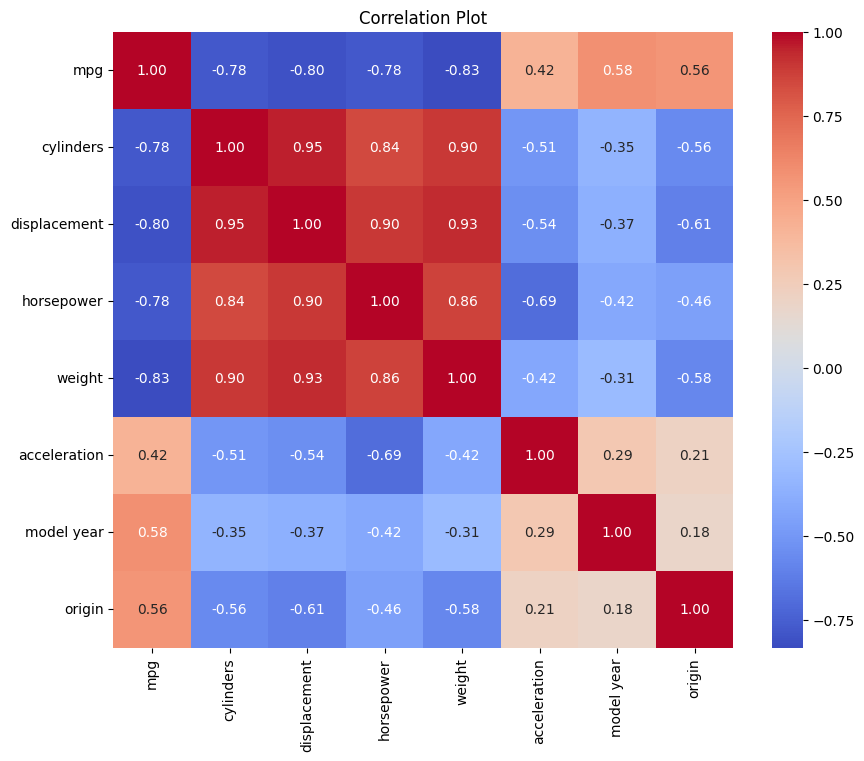

In [44]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Plot')


## Step 8: Bivariate plot (2/2)


Generate a pairplot.


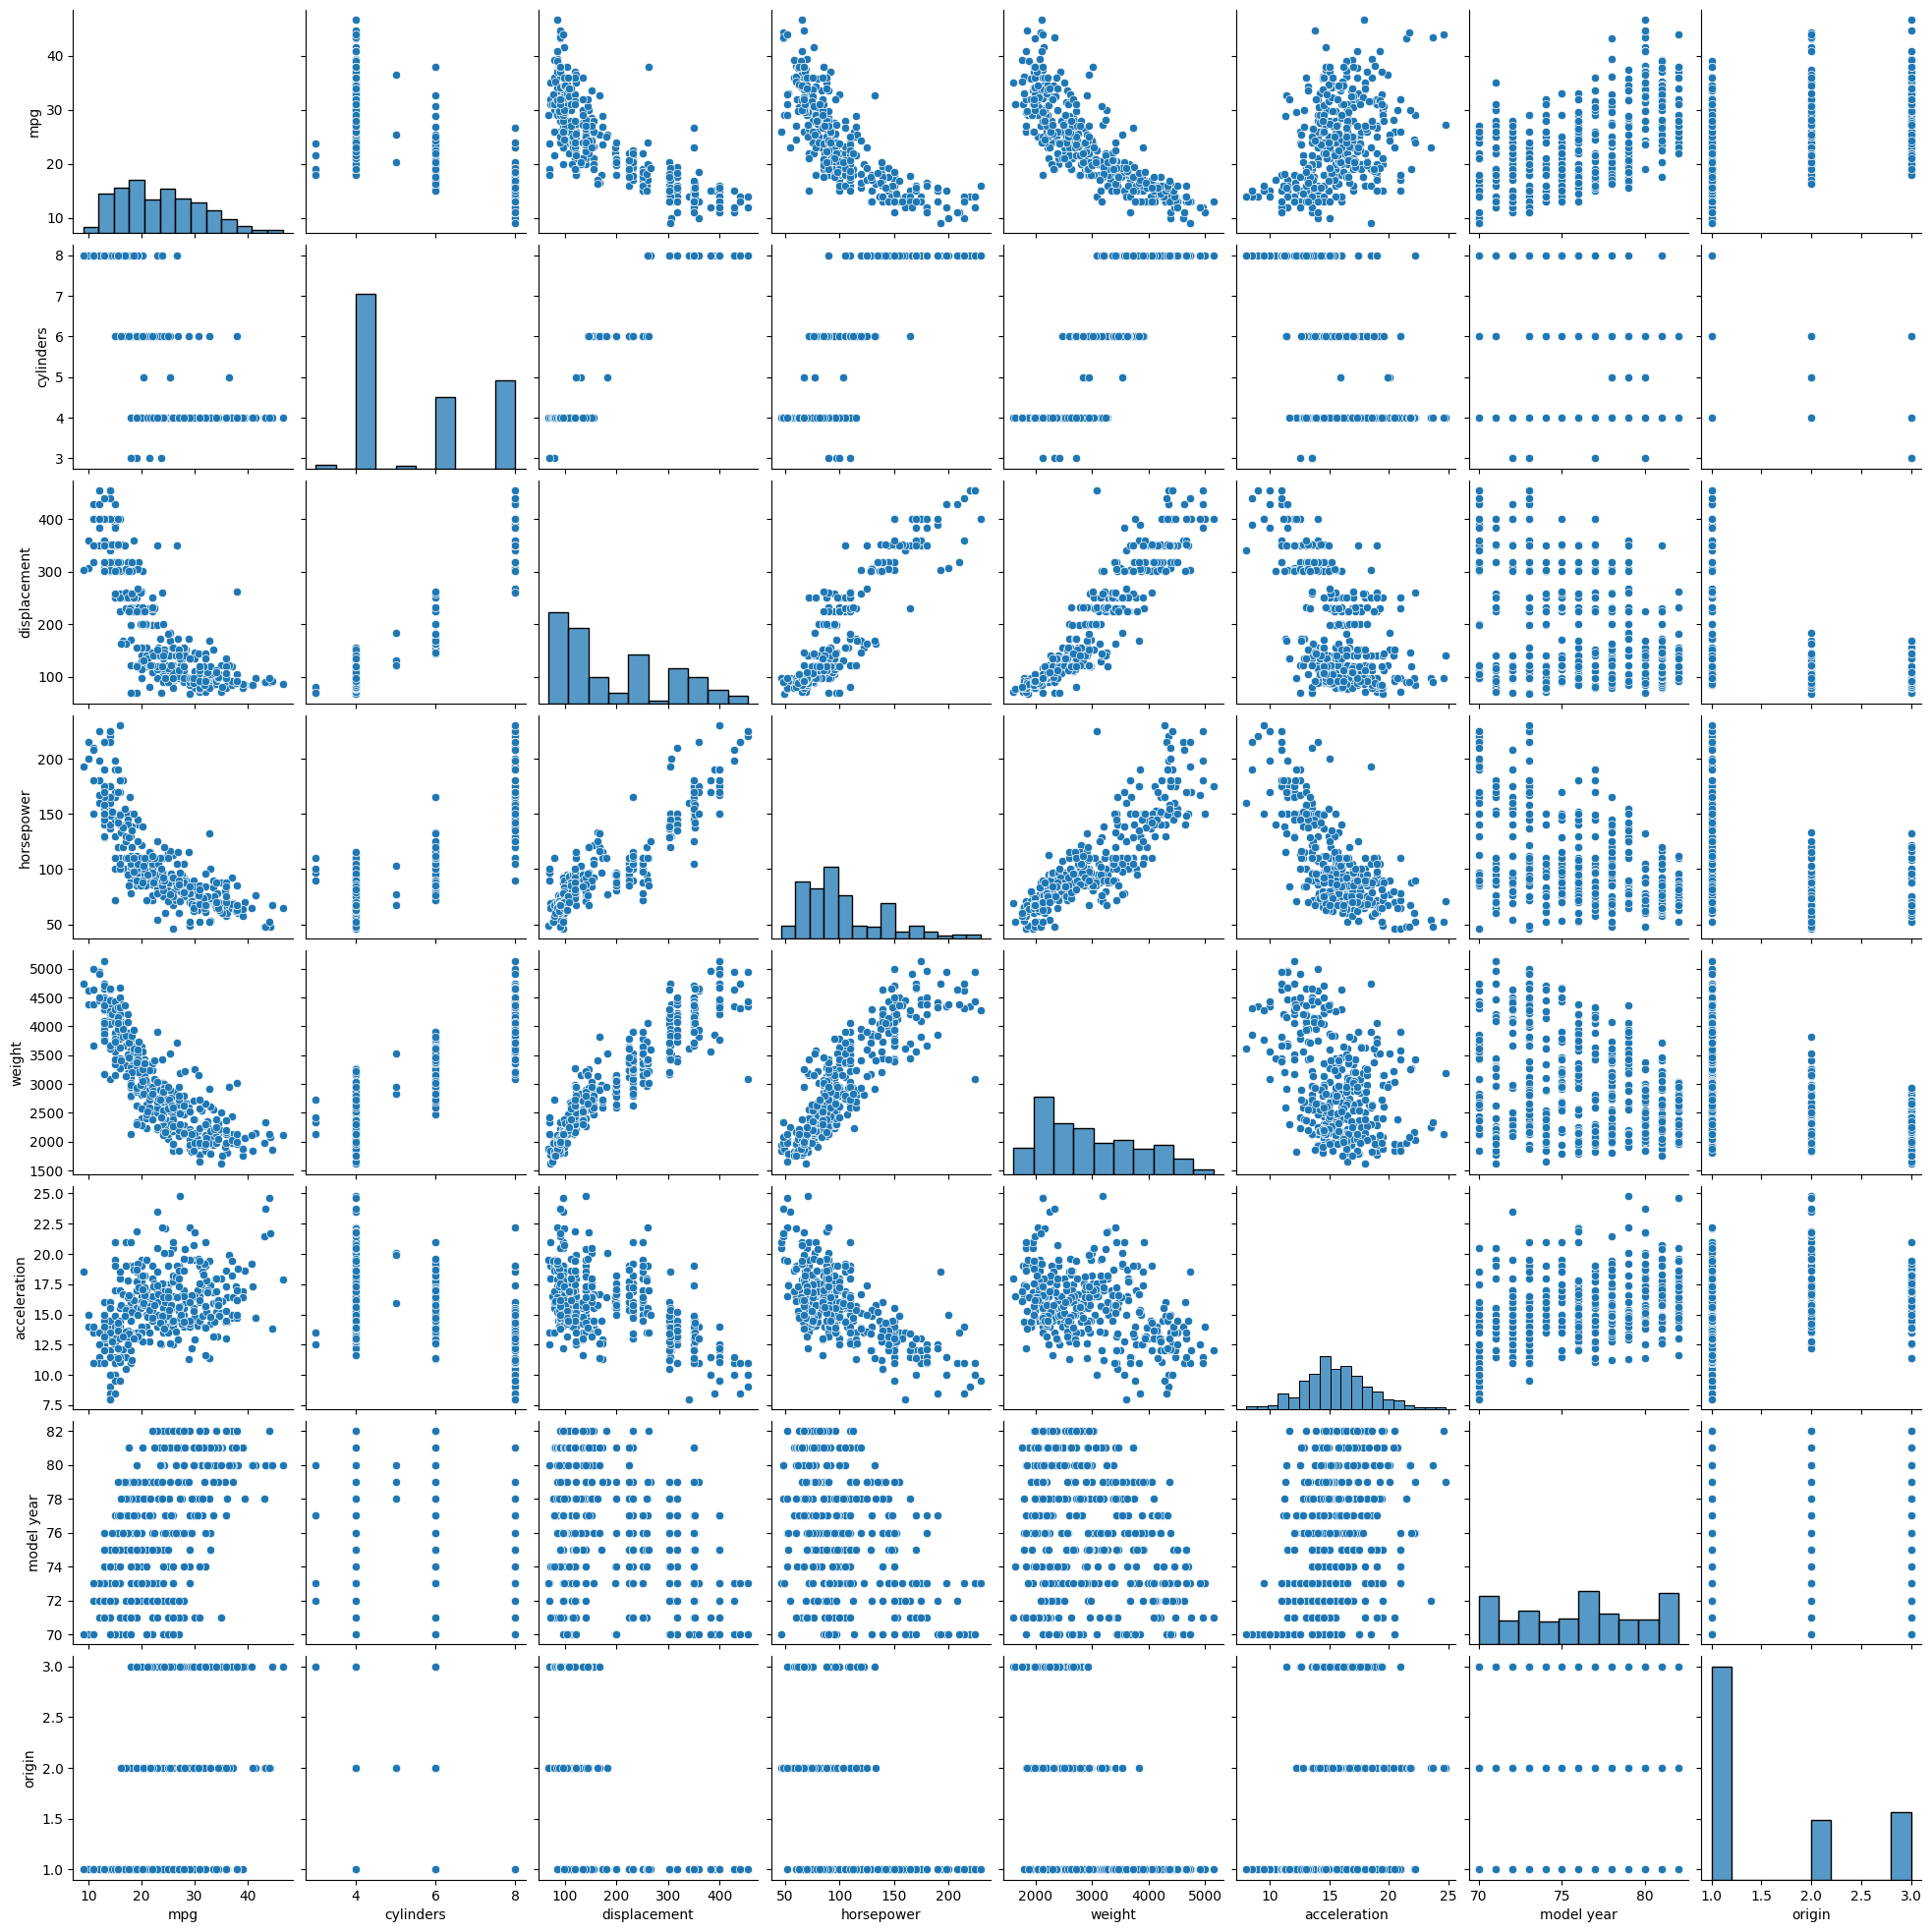

In [45]:
sns.pairplot(df)

## Step 9: Conclusion


If we were going to build a predictive model ( supervised learning ) using this dataset, what do you think would be a good response ( aka target ) variable and why?

In [46]:
'''Chat GPT thoughts on selecting a good target-

In supervised learning, the response variable, also known as the target variable, is the variable we are trying to predict based on the input features. In the context of building a predictive model using a dataset, selecting a good response variable depends on the problem we are trying to solve and the nature of the dataset. Here are some considerations for selecting a good response variable:

1. **Relevance to the Problem**: The response variable should be directly related to the problem we are trying to solve. It should capture the outcome or phenomenon of interest.

2. **Availability and Accessibility**: The response variable should be readily available and accessible in the dataset. It should be present in a sufficient number of observations to train and evaluate the model effectively.

3. **Measurability**: The response variable should be measurable and quantifiable. It should represent a clear and well-defined concept that can be observed or measured accurately.

4. **Predictive Power**: The response variable should have predictive power—that is, it should be influenced by the input features in the dataset. A good response variable should exhibit some level of correlation or association with the input features, allowing the model to learn and make accurate predictions.

Given these considerations and without specific details about the dataset in question, it's challenging to recommend a specific response variable. However, some common response variables in predictive modeling include:

- **Continuous Variables**: These are numerical variables with a continuous range of values. Examples include sales revenue, temperature, stock prices, and housing prices.
- **Binary Variables**: These are categorical variables with only two possible outcomes. Examples include customer churn (churned or not churned), fraud detection (fraudulent or not fraudulent), and medical diagnosis (disease present or not present).
- **Multiclass Variables**: These are categorical variables with more than two possible outcomes. Examples include customer segmentation (e.g., low, medium, high-value customers), sentiment analysis (positive, neutral, negative sentiment), and disease classification (multiple disease categories).

Ultimately, the choice of response variable depends on the specific problem we are trying to solve and the goals of the predictive modeling project. It's essential to carefully consider the characteristics of the dataset and the objectives of the analysis when selecting a response variable for building a predictive model.'''

SyntaxError: invalid syntax (<ipython-input-46-a8aa13adfa51>, line 1)

 Displacement is related to engine size and performance. Because of corrolation and density of quality of data we can use those variables to classify vehicle types (e.g., economy, standard, performance) or estimating engine power.